In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(42)
random.seed(42)

In [4]:
n_samples = 2000

u = np.random.uniform(0, 1, n_samples)
X = np.column_stack((u, np.zeros(n_samples)))

z = np.random.uniform(-1, 0, n_samples)
Y = np.column_stack((z, np.zeros(n_samples)))

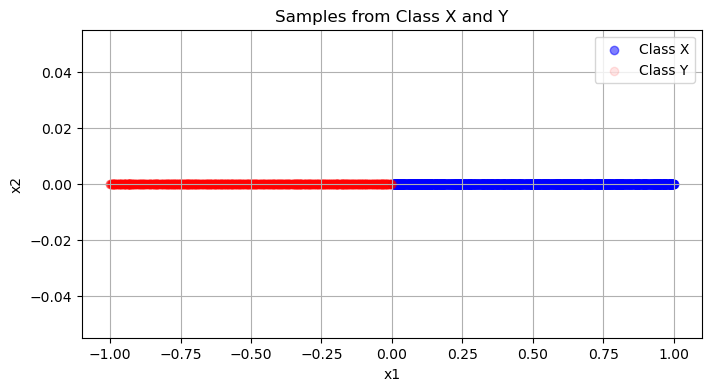

In [5]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Class X', alpha=0.5)
plt.scatter(Y[:, 0], Y[:, 1], color='red', label='Class Y', alpha=0.1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Samples from Class X and Y")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
X_data = np.vstack([X, Y])
y = np.array([0] * n_samples + [1] * n_samples)

print(X_data.shape)
print(y.shape)

(4000, 2)
(4000,)


In [7]:
indices = list(range(X_data.shape[0]))
np.random.shuffle(indices)

X = X_data[indices]
y = y[indices]

print(X.shape)
print(y.shape)

(4000, 2)
(4000,)


### Splitting Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape, X_test.shape)  
print(y_train.shape, y_test.shape)  


(3200, 2) (800, 2)
(3200,) (800,)


## 📌 k-Nearest Neighbors (KNN) Classifier

**k-Nearest Neighbors (KNN)** is a simple, yet powerful, non-parametric supervised learning algorithm used for both classification and regression tasks. It is an **instance-based** or **lazy learner**, meaning it does not build an explicit model but makes predictions based on the entire training data.

### 🔢 How KNN Works (for Classification):

1. For a given test point, calculate its distance to all training samples using a distance metric (in our case, **Euclidean distance**).
2. Select the **k nearest neighbors** (samples with the smallest distances).
3. Assign the class label that is **most frequent** among these k neighbors.

### 📐 Euclidean Distance Formula:

For two vectors $ \mathbf{x} = [x_1, x_2] $ and $ \mathbf{y} = [y_1, y_2] $, the Euclidean distance is:

$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}
$$

### 🎯 Choice of k:

- $k = 1$: very flexible, but may lead to **overfitting**.
- Larger $k$: smoother decision boundary, better generalization, but may cause **underfitting**.
- The **optimal value of k** is usually chosen using cross-validation.

### ✅ Evaluation Metric: Accuracy

After predicting labels for the test set, we compute **accuracy** as:

$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$$

We will evaluate the KNN classifier with the following values of $k$: **1, 5, 20, 50**, and report the accuracy on the test data.


In [9]:
def euclidean_distance(X, a):
    return np.sqrt(np.sum((X - a) ** 2, axis=1))

In [12]:
def knn(X_train, X_test, y_train, k=1, distance_metric=euclidean_distance):
    y_pred = []

    for test_point in X_test:
        distances = distance_metric(X_train, test_point)
        nearest_indices = np.argsort(distances)[:k]
        k_neighbors_classes = y_train[nearest_indices]
        k_neighbors_distances = distances[nearest_indices]

        class_counts = np.bincount(k_neighbors_classes)
        max_count = np.max(class_counts)
        majority_classes = np.where(class_counts == max_count)[0]
        
        if len(majority_classes) == 1:
            predicted_class = majority_classes[0]
        else:
            total_distances = []
            for cls in majority_classes:
                total_distance = np.sum(k_neighbors_distances[k_neighbors_classes == cls])
                total_distances.append((cls, total_distance))

            predicted_class = min(total_distances, key=lambda x: x[1])[0]

        y_pred.append(predicted_class)

    return np.array(y_pred)


In [14]:
ks = [1, 5, 20, 50]
for k in ks:
    y_pred = knn(X_train, X_test, y_train, k, euclidean_distance)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    print(f"k={k}, Accuracy (Euclidean): {accuracy}")

k=1, Accuracy (Euclidean): 1.0
k=5, Accuracy (Euclidean): 1.0
k=20, Accuracy (Euclidean): 1.0
k=50, Accuracy (Euclidean): 1.0


### KNN with Cosine Distance

In this implementation, we use the K-Nearest Neighbors (KNN) algorithm with **cosine distance** as the distance metric to classify test samples.

#### 📌 Overview
- **KNN** is a simple yet powerful non-parametric classifier.  
- For each test point, it finds the $k$ closest training points (neighbors) based on a distance metric.  
- The predicted class is determined by majority voting among these neighbors.

#### 🚀 Why Cosine Distance?
- Unlike Euclidean distance, which measures absolute distance in space, **cosine distance** measures the **angular difference** between vectors.
- It is especially useful when the **magnitude** of the vectors is less important than their **orientation**, for example in text data or high-dimensional sparse data.

#### ⚙️ Algorithm Steps
1. For each test sample, compute the **cosine distance** to all training samples.
2. Select the $k$ training samples with the smallest cosine distances (i.e., highest cosine similarity).
3. Determine the majority class among these $k$ neighbors.
4. If there is a tie (multiple classes with the same count), choose the class whose neighbors have the **smallest total distance** to the test point.

#### 📝 Cosine Distance Formula

$$
\text{cosine\_distance}(A, B) = 1 - \frac{A \cdot B}{\|A\| \|B\|}
$$

#### ✅ Advantages
- Works well in high-dimensional spaces where Euclidean distance may become less informative (curse of dimensionality).
- Focuses on the **direction** of the vectors, making it robust to differences in scale.


In [15]:
def cosine_distance(a, b):
    return 1 - np.dot(a, b)/(np.linalg.norm(a) * np.linalg.norm(b))

In [16]:
ks = [1, 5, 20, 50]
for k in ks:
    y_pred = knn(X_train, X_test, y_train, k, cosine_distance)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    print(f"k={k}, Accuracy (Euclidean): {accuracy}")

k=1, Accuracy (Euclidean): 1.0
k=5, Accuracy (Euclidean): 1.0
k=20, Accuracy (Euclidean): 1.0
k=50, Accuracy (Euclidean): 1.0


### Adding Gaussian Noise to Training and Test Data

In this section, we add Gaussian noise to the training and test datasets to simulate the effect of measurement errors or natural variability in data. This is a common technique to test the robustness of machine learning models against small perturbations.

#### 📌 Steps:
1. **Generate noise for training data:**
   - Draw samples from a normal distribution with mean `0` and standard deviation `0.1`.
   - Shape: `(number of training samples, 1)`.

2. **Pad the noise:**
   - Concatenate zeros to the generated noise along the feature dimension to ensure the noise only affects the first feature.
   - This results in noise of shape `(number of training samples, number of features)`.

3. **Add noise to the original data:**
   - The noisy training data is obtained by simple addition.

4. **Repeat the same process for the test data.**


In [17]:
noise = np.random.normal(0, 0.1, size=(X_train.shape[0], 1))
noise = np.c_[noise, np.zeros(X_train.shape[0])]
X_train_noisy = X_train + noise

noise = np.random.normal(0, 0.1, size=(X_test.shape[0], 1))
noise = np.c_[noise, np.zeros(X_test.shape[0])]
X_test_noisy = X_test + noise

print(X_train_noisy.shape)
print(X_test_noisy.shape)

(3200, 2)
(800, 2)


In [23]:
column_names = ['X1', 'X2', 'class']
df = pd.DataFrame(np.c_[X_train_noisy, y_train], columns=column_names)

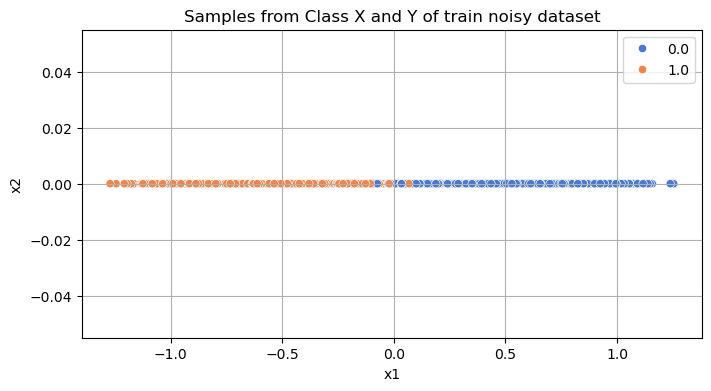

In [28]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df,x='X1', y='X2', hue='class', palette='muted')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Samples from Class X and Y of train noisy dataset")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
ks = [1, 5, 20, 50]
for k in ks:
    y_pred = knn(X_train_noisy, X_test_noisy, y_train, k, euclidean_distance)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    print(f"k={k}, Accuracy (Euclidean): {accuracy}")

k=1, Accuracy (Euclidean): 0.94625
k=5, Accuracy (Euclidean): 0.95625
k=20, Accuracy (Euclidean): 0.96125
k=50, Accuracy (Euclidean): 0.965


### Generating a Synthetic Imbalanced Dataset

In this section, we generate a synthetic dataset with two classes to simulate an **imbalanced classification problem**.

#### 📌 Dataset Characteristics
- **Class 0**
  - Number of samples: `10,000`
  - Feature `X1` sampled uniformly from `[0, 1]`.
  - Feature `X2` is set to `0`.
- **Class 1**
  - Number of samples: `1,000`
  - Feature `X1` sampled uniformly from `[-1, 0]`.
  - Feature `X2` is set to `0`.

This creates two distinct distributions in the feature space with a **class imbalance ratio of 10:1**.


In [32]:
n_samples0 = 10000
n_samples1 = 1000

class0_data = np.random.uniform(0, 1, size=(n_samples0, 1))
class0_data = np.c_[class0_data, np.zeros(n_samples0)]

class1_data = np.random.uniform(-1, 0, size=(n_samples1, 1))
class1_data = np.c_[class1_data, np.zeros(n_samples1)]

X = np.vstack([class0_data, class1_data])
y = np.array([0] * n_samples0 + [1] * n_samples1)

print(X.shape)
print(y.shape)

(11000, 2)
(11000,)


In [33]:
indices = list(range(X.shape[0]))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape, X_test.shape)  
print(y_train.shape, y_test.shape)  


(8800, 2) (2200, 2)
(8800,) (2200,)


In [35]:
column_names = ['X1', 'X2', 'class']
df_imbalanced = pd.DataFrame(np.c_[X, y], columns=column_names)

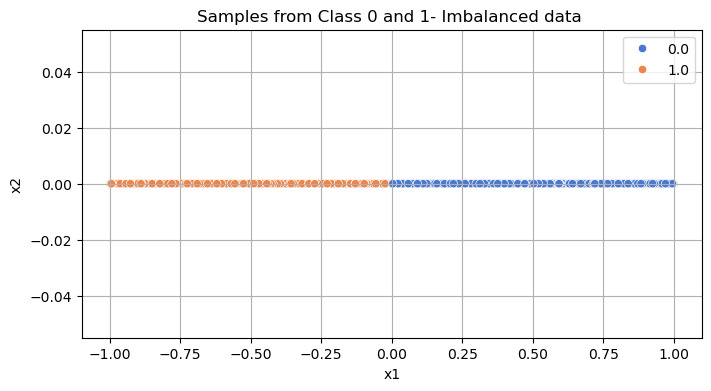

In [49]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_imbalanced,x='X1', y='X2', hue='class', palette='muted')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Samples from Class 0 and 1- Imbalanced data ")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
classes, counts = np.unique(y, return_counts=True)
print(dict(zip(classes, counts)))

{0: 10000, 1: 1000}


In [48]:
ks = [1, 5, 20, 50]
for k in ks:
    y_pred = knn(X_train, X_test, y_train, k, euclidean_distance)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    print(f"k={k}, Accuracy (Euclidean): {accuracy}")

k=1, Accuracy (Euclidean): 1.0
k=5, Accuracy (Euclidean): 1.0
k=20, Accuracy (Euclidean): 1.0
k=50, Accuracy (Euclidean): 1.0
